# Homework 5

## Image Processing and Pixel Classification


This week's homework is about classifying pixels in a sattelite image:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.io import loadmat
import pandas as pd

The image below a sattelite image of Salinas Valley, California of 512 pixels by 217 pixels where individual values tells us what is planted in that specific area: 

0         Brocoli_green_weeds_1 
1         Brocoli_green_weeds_2 
2                        Fallow 
3             Fallow_rough_plow 
4                 Fallow_smooth 
5                       Stubble 
6                        Celery 
7              Grapes_untrained 
8          Soil_vinyard_develop 
9     Corn_senesced_green_weeds 
10          Lettuce_romaine_4wk 
11          Lettuce_romaine_5wk 
12          Lettuce_romaine_6wk 
13          Lettuce_romaine_7wk 
14            Vinyard_untrained 
15     Vinyard_vertical_trellis 
Name: Class , dtype: object

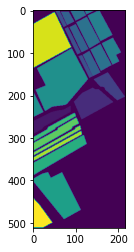

In [4]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas = loadmat('data/Salinas.mat')['salinas']
salinas_classes = pd.read_csv('data/Salinas_classes.csv',sep='\t')['Class ']
plt.imshow(salinas_gt)
salinas_classes

The main data `salinas` is a tensor (i.e. a multi-dimensional array) of shape (512,217,224). This means we have 224 different greyscale images taken in different wavelengths. Below, I am going to reshape the data into a matrix of shape $(512\cdot 217,224)$ so that each row is a flattened matrix.

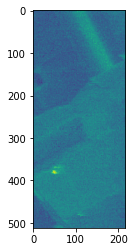

In [5]:
scaler = MinMaxScaler()
salinas_reshaped = scaler.fit_transform(salinas.reshape((512*217,224)))
salinas_gt_reshaped = salinas_gt.reshape(512*217)

plt.imshow(salinas_reshaped[:,0].reshape((512,217)))

## Question

Each pixel belongs to a specific class given by `salinas_classes`.  Form a 

1. Linear Discriminant Analysis model,
2. Support Vector Machines model,
3. Logistic Regression model,
4. Decision Tree model,
5. Boosted Tree model

to predict which pixel belongs to which class. Train and test your model and evaluate your accuracy together with a confidence interval.

#### Warning : In lack of computation power I could not make a test more than one time at some models.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.stats import t
import xgboost as xgb
import pandas as pd
import numpy as np

In [7]:
def doExperiment(xs, ys, model, ts = 0.8):
    X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = ts)
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

#### Linear Discriminant Analysis Model

In [8]:
xs = salinas_reshaped
ys = salinas_gt_reshaped

In [9]:
N = 5
experiments = np.array([doExperiment(xs, ys, LinearDiscriminantAnalysis()) for i in range (N)])
t.interval(0.95, N-1, loc = experiments.mean(), scale = experiments.var())

(0.8109550045511589, 0.8109612008401375)

#### Support Vector Machines Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.8)
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7422258224202332


#### Logistic Regression Model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.8)
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7263849511723145


/home/mlhsntrk/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### Decision Tree Model

In [10]:
N = 5
experiments = np.array([doExperiment(xs, ys, DecisionTreeClassifier(criterion = 'entropy')) for i in range (N)])
t.interval(0.95, N-1, loc = experiments.mean(), scale = experiments.var())

(0.8600282519150994, 0.8600563527381567)

#### Boosted Tree Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size = 0.8)
model = xgb.XGBClassifier(objective = 'binary:logistic', eval_metric = 'error')
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/mlhsntrk/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9172179469870843
